In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv("Fraud_check.csv")
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [14]:
data2 = data.rename({'Marital.Status':'Marital_Status','Taxable.Income':'Taxable_Income','City.Population':'City_Population','Work.Experience':'Work_Experience'},axis = 1)
data2

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [15]:
data2['Undergrad'] = data2['Undergrad'].map({'NO':0,'YES':1})
data2['Marital_Status'] = data2['Marital_Status'].map({'Single':1,'Divorced':0,'Married':2})
data2['Urban'] = data2['Urban'].map({'YES':1,'NO':0})

In [16]:
data2.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,0,1,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,2,36925,160205,30,1
3,1,1,50190,193264,15,1
4,0,2,81002,27533,28,0


In [18]:
data2["taxable_income"]="Safe"
data2.loc[data2["Taxable_Income"]<=30000,"taxable_income"]="Dicey"
data2.drop(['Taxable_Income'],axis = 1,inplace = True)

In [20]:
X = data2.iloc[:,0:5]
X

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban
0,0,1,50047,10,1
1,1,0,134075,18,1
2,0,2,160205,30,1
3,1,1,193264,15,1
4,0,2,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,2,180083,17,0


In [21]:
Y = data2.iloc[:,5]
Y

0      Safe
1      Safe
2      Safe
3      Safe
4      Safe
       ... 
595    Safe
596    Safe
597    Safe
598    Safe
599    Safe
Name: taxable_income, Length: 600, dtype: object

In [22]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 30)

In [23]:
modelDT = DecisionTreeClassifier(criterion = 'gini',max_depth = 7)
modelDT.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7)

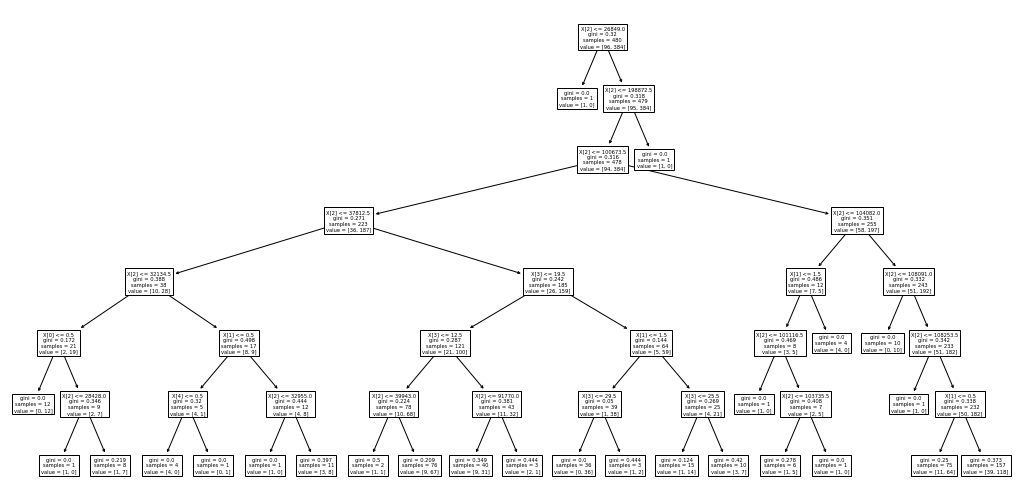

In [24]:
fig = plt.figure(figsize = (18,9))
tree.plot_tree(modelDT)
plt.show()

In [26]:
preds = modelDT.predict(x_test)  
pd.Series(preds).value_counts()
preds

array(['Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe',
       'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe',
       'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe',
       'Safe', 'Safe', 'Safe', 'Safe', 'Dicey', 'Safe', 'Safe', 'Safe',
       'Safe', 'Safe', 'Dicey', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe',
       'Safe', 'Safe', 'Dicey', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe',
       'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe',
       'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe',
       'Safe', 'Safe', 'Dicey', 'Dicey', 'Safe', 'Safe', 'Safe', 'Safe',
       'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe',
       'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Dicey', 'Safe', 'Safe',
       'Safe', 'Safe', 'Safe', 'Safe', 'Dicey', 'Safe', 'Safe', 'Safe',
       'Safe', 'Safe', 'Safe', 'Safe', 'Dicey', 'Safe', 'Safe', 'Safe',
       'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe'

In [27]:
np.mean(preds==y_test)*100

72.5

In [28]:
df_t = pd.DataFrame({'Actual':y_test, 'Predicted':preds})
df_t

,Actual,Predicted
549,Safe,Safe
124,Safe,Safe
422,Safe,Safe
579,Safe,Safe
74,Safe,Safe
...,...,...
470,Safe,Safe
540,Dicey,Safe
236,Safe,Safe
212,Safe,Safe


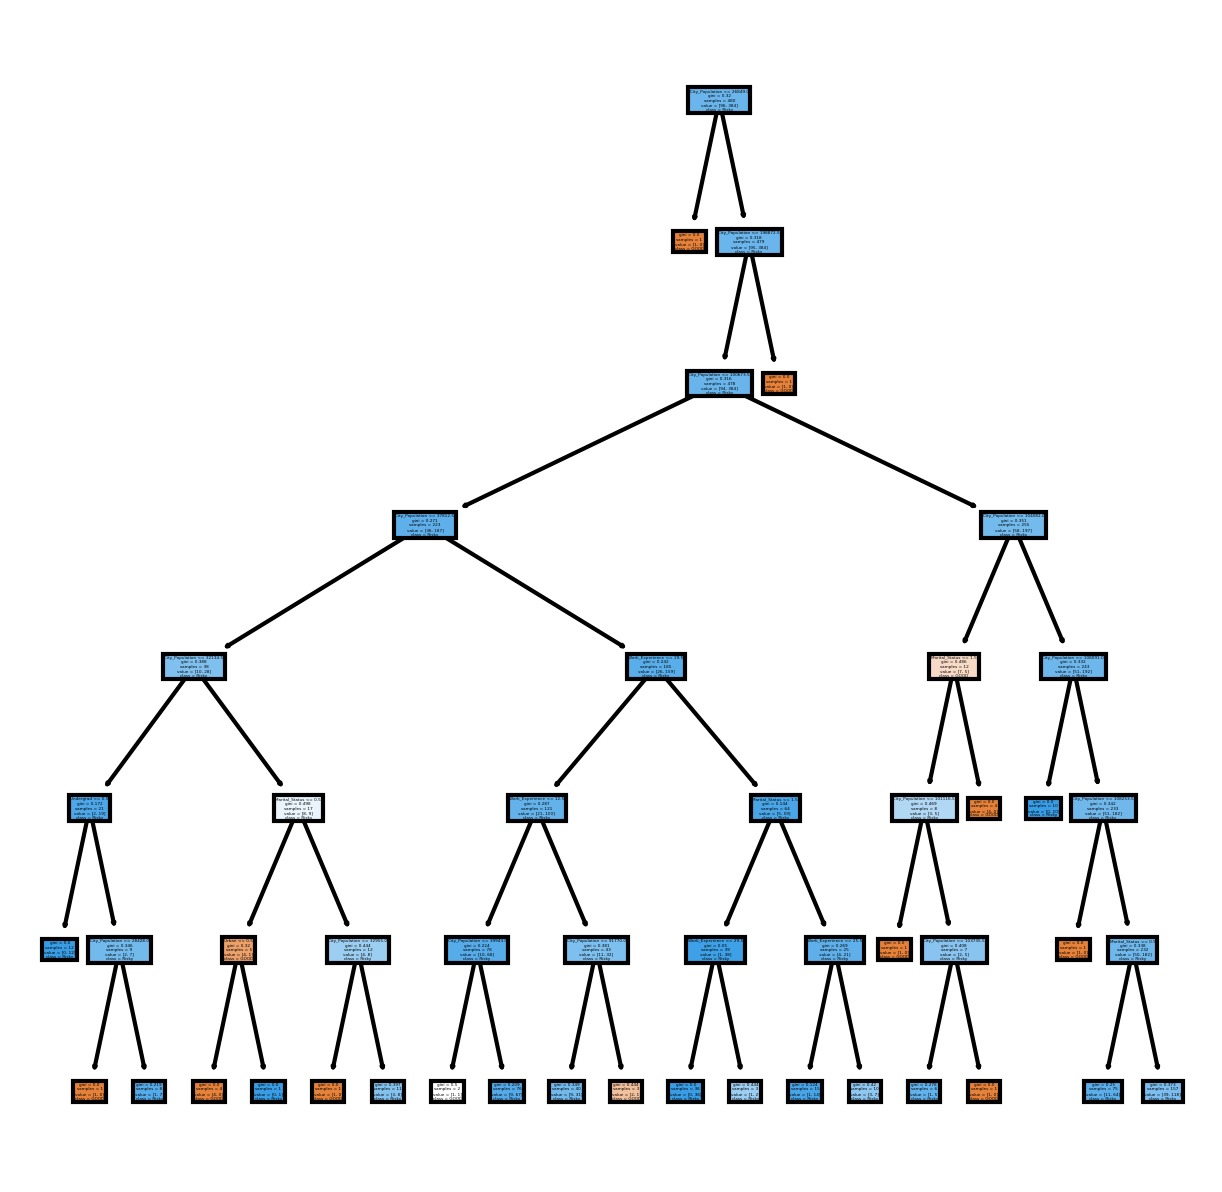

In [29]:
fn = ['Undergrad','Marital_Status','City_Population','Work_Experience','Urban']
cn = ['GOOD','Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(modelDT,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [30]:
modelDT.feature_importances_

array([0.01759367, 0.18085506, 0.64450915, 0.10162204, 0.05542007])

In [34]:
c = pd.DataFrame({'Feature': list(x_train.columns),
                   'Importance': modelDT.feature_importances_}).\
                    sort_values('Importance', ascending = False)
c

,Feature,Importance
2,City_Population,0.644509
1,Marital_Status,0.180855
3,Work_Experience,0.101622
4,Urban,0.055420
0,Undergrad,0.017594
